<a href="https://colab.research.google.com/github/Naqeebullah11/My-Projects/blob/main/Mini_Project_%E2%80%93_Iris_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# 2. Load Iris Dataset

In [ ]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Map target integers to actual class names for readability


In [ ]:
target_names = dict(enumerate(iris.target_names))
y_named = y.map(target_names)

# 3. Basic Statistics and Check Missing Values


In [ ]:
print("Basic Statistics:\n", X.describe().T)
print("\nMissing Values:\n", X.isnull().sum())


Basic Statistics:
                    count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


# 4. Visualizations of Histogram

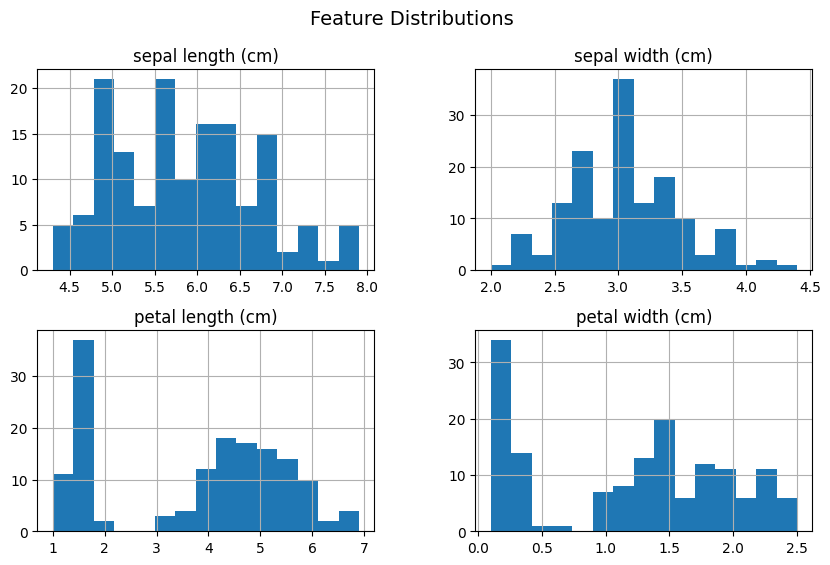

In [ ]:
X.hist(figsize=(10, 6), bins=15)
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Boxplots


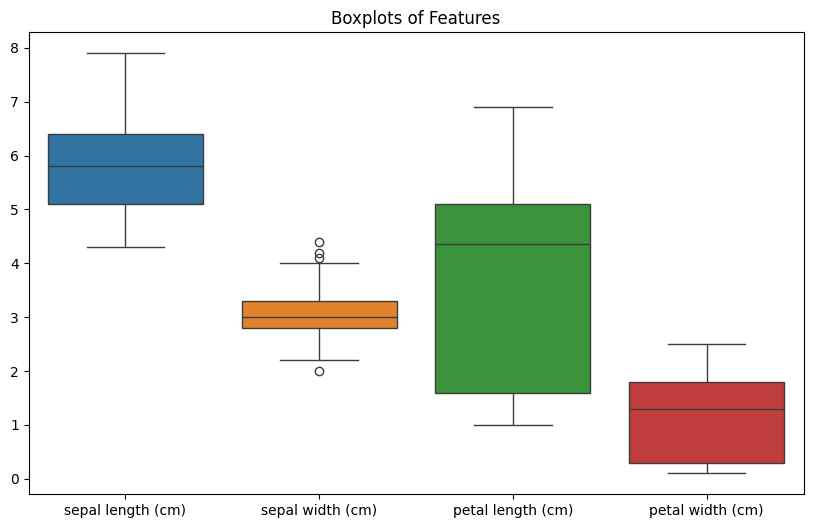

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.title("Boxplots of Features")
plt.show()

# Scatter Plot (Petal Length vs Petal Width)

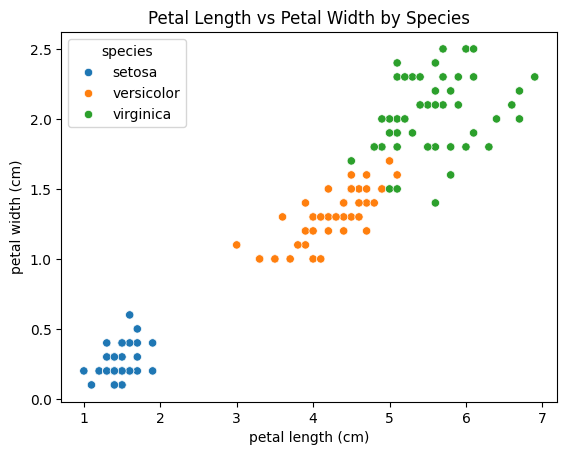

In [ ]:
sns.scatterplot(x=X['petal length (cm)'], y=X['petal width (cm)'], hue=y_named)
plt.title("Petal Length vs Petal Width by Species")
plt.show()

# Heatmap of correlations

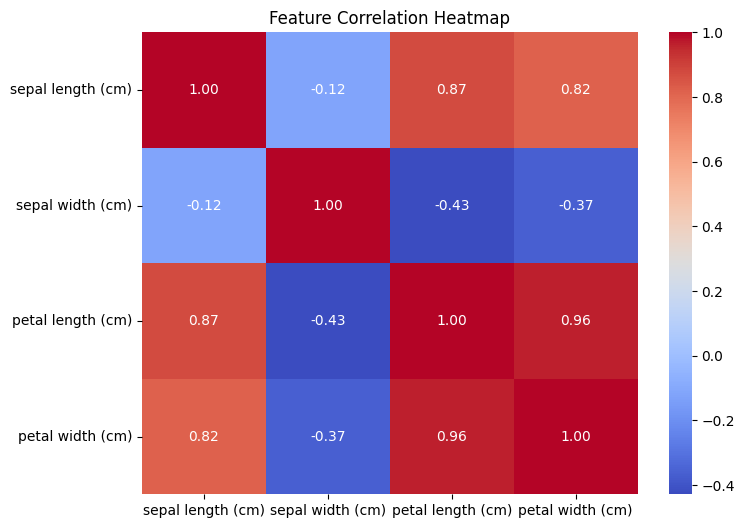

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 5. Scale Features


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split the Dataset (80% train, 20% test)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Train Logistic Regression Model


In [ ]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# 8. Predict on Test Set


In [ ]:
y_pred = log_model.predict(X_test)


# 9. Evaluation


In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Confusion Matrix


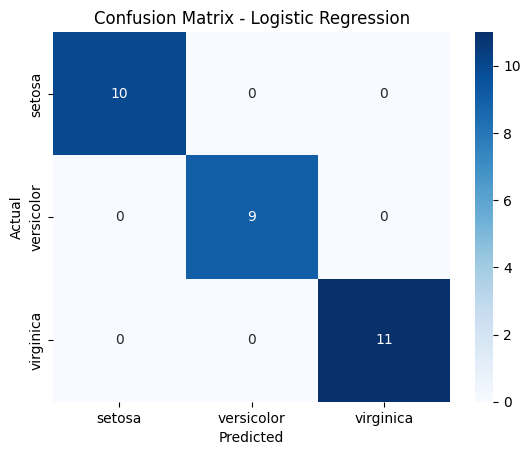

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# 10. Predict on New Sample


In [ ]:
new_sample = [[5.1, 3.5, 1.4, 0.2]]
new_sample_scaled = scaler.transform(new_sample)  # Scale before predicting!
predicted_class = log_model.predict(new_sample_scaled)
print("\nPredicted Class for Sample", new_sample, "=>", iris.target_names[predicted_class[0]])


Predicted Class for Sample [[5.1, 3.5, 1.4, 0.2]] => setosa


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
